In [68]:
import numpy as np
import pandas as pd

from path import Path

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [69]:
df = pd.read_csv(Path('Resources/crypto_data.csv'))


In [70]:
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [71]:
df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [72]:
df_trading = df[df['IsTrading'] == True]

In [73]:
df_trading = df_trading.drop('IsTrading', axis=1)


In [74]:
df_trading

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [75]:
df_trading.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   ProofType        1144 non-null   object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  1144 non-null   object 
dtypes: float64(1), object(5)
memory usage: 62.6+ KB


In [76]:
df_trading.dropna(inplace=True)

In [77]:
df_trading

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [78]:
trade_df=df_trading[df_trading['TotalCoinsMined'] > 0]

In [79]:
trade_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [80]:
trade_df = trade_df.drop('CoinName', axis=1)

In [81]:
trade_df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [82]:
coin_df = trade_df['Unnamed: 0']

In [83]:
coin_df.head(100)


0        42
2       404
5      1337
7       BTC
8       ETH
       ... 
203     XJO
205     XST
208     ZCC
210     BCN
212     XDN
Name: Unnamed: 0, Length: 100, dtype: object

In [84]:
trade_df=trade_df.set_index('Unnamed: 0')

In [85]:
trade_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610


In [86]:
trade_df['Algorithm'].value_counts()

Scrypt                 182
X11                     73
SHA-256                 48
CryptoNight             19
X13                     17
                      ... 
Dagger-Hashimoto         1
Shabal256                1
Argon2d                  1
VBFT                     1
Semux BFT consensus      1
Name: Algorithm, Length: 71, dtype: int64

In [87]:
trade_df['ProofType'].value_counts()

PoW                     237
PoW/PoS                 176
PoS                      86
DPoS                      9
PoC                       3
PoS/PoW                   2
POBh                      1
PoW/nPoS                  1
dPoW/PoW                  1
HPoW                      1
Zero-Knowledge Proof      1
PoS/LPoS                  1
PoW + Hive                1
Proof of Authority        1
PoST                      1
LPoS                      1
PoA                       1
Pos                       1
Proof of Trust            1
DPOS                      1
PoW/PoS                   1
PoW/PoW                   1
PoS/PoW/PoT               1
TPoS                      1
PoW and PoS               1
Name: ProofType, dtype: int64

In [88]:
X = pd.get_dummies(trade_df, columns =['Algorithm', 'ProofType'])
X.head(100)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XJO,3.919574e+07,45000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
XST,3.309373e+07,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ZCC,1.479902e+08,1000000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [89]:
X.shape

(532, 98)

In [90]:
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

In [91]:
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])


[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

In [92]:
# reducing dimensions using principal components
pca = PCA(n_components=0.99)

# Get two principal components for the cryto data.
_pca = pca.fit_transform(X_scaled)

In [93]:
_pca.shape

(532, 86)

In [94]:
index_values = (X.index.tolist())
index_values


['42',
 '404',
 '1337',
 'BTC',
 'ETH',
 'LTC',
 'DASH',
 'XMR',
 'ETC',
 'ZEC',
 'BTS',
 'DGB',
 'BTCD',
 'XPY',
 'PRC',
 'KOBO',
 'SPR',
 'ARG',
 'AUR',
 'BLU',
 'XMY',
 'MOON',
 'ZET',
 'SXC',
 'QTL',
 'ENRG',
 'QRK',
 'RIC',
 'DGC',
 'BTB',
 'CAT',
 'CBX',
 'CCN',
 'CRYPT',
 'CSC',
 'DMD',
 'XVG',
 'DVC',
 'EAC',
 'EFL',
 'EMC2',
 'EMD',
 'EXCL',
 'FLT',
 'FRK',
 'FTC',
 'GDC',
 'GLC',
 'GLD',
 'HBN',
 'HYP',
 'IFC',
 'IOC',
 'IXC',
 'KGC',
 'LKY',
 'LTB',
 'MAX',
 'MEC',
 'MED',
 'MINT',
 'MINC',
 'MZC',
 'NAUT',
 'NAV',
 'NOBL',
 'NMC',
 'NYAN',
 'OPAL',
 'ORB',
 'POT',
 'PXC',
 'RDD',
 'RPC',
 'SBC',
 'SMC',
 'SUPER',
 'SYNC',
 'SYS',
 'TES',
 'TGC',
 'TIT',
 'TOR',
 'TRC',
 'UNB',
 'UNO',
 'URO',
 'USDE',
 'UTC',
 'VIA',
 'VRC',
 'VTC',
 'WDC',
 'XC',
 'XCR',
 'XJO',
 'XST',
 'ZCC',
 'BCN',
 'XDN',
 'BURST',
 'SJCX',
 'MONA',
 'NTRN',
 'FAIR',
 'NLG',
 'RBY',
 'PTC',
 'KORE',
 'WBB',
 'NOTE',
 'FLO',
 '8BIT',
 'STV',
 'ABY',
 'FLDC',
 'U',
 'UIS',
 'CYP',
 'OMC',
 'VTR',
 'GRE'

In [95]:
_pca_df = pd.DataFrame(
    data=_pca, index=index_values
)
_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
42,-0.335099,1.032189,-0.590713,0.001397,8.903525e-15,3.715567e-12,-1.716189e-14,-0.007129,-1.319756,-0.051813,...,1.255726e-15,-0.677740,0.194423,0.147800,0.283666,-0.632204,-0.114891,0.133916,-0.115938,0.009344
404,-0.318434,1.032331,-0.591126,0.001386,8.797456e-15,3.685202e-12,-1.704862e-14,-0.007739,-1.322514,-0.056674,...,1.222771e-15,-0.677741,0.194452,0.147753,0.283593,-0.632066,-0.114763,0.133991,-0.115646,0.009188
1337,2.305468,1.656383,-0.683617,0.004731,1.292867e-14,1.259214e-11,-2.400344e-14,-0.054781,-1.542879,-0.943951,...,-3.450151e-14,0.619545,0.421467,0.267518,-0.286185,0.453215,-0.447750,-0.073419,0.179144,-1.419059
BTC,-0.145184,-1.320593,0.192813,-0.001229,-2.452485e-15,-3.268574e-12,4.249357e-15,-0.002071,0.281463,0.251862,...,-1.152606e-14,0.238515,0.162774,0.130823,-0.103999,0.457951,-0.089676,-0.317943,0.001320,0.178234
ETH,-0.151768,-2.036192,0.396182,-0.001705,-1.119309e-14,-4.534708e-12,1.170787e-14,0.027735,0.519099,0.188820,...,-7.740960e-14,0.222678,-0.073823,0.358934,0.609940,-0.645370,-0.113545,0.100206,0.044561,0.017486


In [96]:
_pca1_df = _pca_df.join(coin_df, how = 'inner')
_pca1_df.head(100)

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,Unnamed: 0


In [97]:
#fetch the explained variance
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.01022

C:\Users\sunda\anaconda3\envs\fix\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


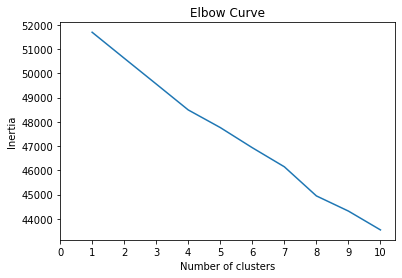

In [98]:
# Finding the best value for k
import matplotlib.pyplot as plt
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(_pca_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [117]:
# Initialize the K-Means model.
model = KMeans(n_clusters=7, random_state=0)
# Fit the model
model.fit(_pca_df)
# Predict clusters
predictions = model.predict(_pca_df)
print(predictions)
_pca_df["class"] = model.labels_
_pca_df.head()

[3 3 3 0 0 0 3 0 0 0 3 0 3 3 0 3 0 0 3 3 0 0 0 0 0 3 0 0 0 3 0 3 0 0 3 3 0
 0 0 0 0 0 3 3 0 6 0 0 0 3 3 0 3 0 0 0 0 3 0 0 3 0 3 3 3 0 0 0 3 6 3 3 3 0
 0 0 3 3 0 3 0 3 3 0 0 0 0 3 3 0 3 0 0 3 3 0 3 3 0 0 3 3 0 3 3 0 3 0 3 0 3
 0 3 3 0 0 3 0 0 0 3 0 0 0 0 0 3 3 0 0 0 3 0 3 0 0 3 0 3 0 3 3 0 0 3 0 0 3
 3 0 3 0 3 3 3 0 0 0 0 3 3 3 3 3 0 0 3 3 3 3 3 0 3 3 3 3 3 0 3 3 3 3 0 3 0
 3 3 0 3 0 3 0 3 0 3 3 3 3 0 3 3 3 3 3 0 0 3 3 0 0 3 3 3 3 3 0 3 3 3 3 3 3
 3 3 0 3 3 3 3 3 3 0 0 0 3 3 3 3 0 3 0 3 3 0 3 0 0 3 0 0 3 0 3 3 3 0 3 3 0
 3 3 3 3 3 3 3 0 3 0 3 3 3 3 0 3 0 3 0 0 0 0 3 0 3 3 0 3 0 0 0 3 0 3 0 0 0
 3 0 3 0 3 3 1 0 3 0 0 0 0 0 3 3 0 3 3 3 0 6 0 3 6 3 0 3 3 3 3 0 3 3 0 3 3
 3 0 6 0 6 3 3 3 3 0 3 0 0 0 3 3 0 0 3 3 0 3 0 0 6 3 6 0 3 3 3 0 0 0 3 3 3
 0 0 3 0 0 0 0 3 3 2 0 0 0 3 3 3 3 3 3 0 0 0 0 3 3 3 0 3 0 3 3 3 4 0 3 3 0
 3 3 0 0 3 0 3 0 0 0 0 3 3 0 3 0 3 3 3 3 3 3 0 0 0 3 3 3 3 3 3 0 3 0 0 0 0
 3 3 3 3 0 3 3 0 3 3 0 3 0 3 0 0 3 3 0 3 0 0 3 0 0 3 0 3 0 3 3 0 3 3 3 3 3
 0 0 0 3 3 3 0 3 6 3 0 3 

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,class
42,-0.335099,1.032189,-0.590713,0.001397,8.903525e-15,3.715567e-12,-1.716189e-14,-0.007129,-1.319756,-0.051813,...,-0.677740,0.194423,0.147800,0.283666,-0.632204,-0.114891,0.133916,-0.115938,0.009344,3
404,-0.318434,1.032331,-0.591126,0.001386,8.797456e-15,3.685202e-12,-1.704862e-14,-0.007739,-1.322514,-0.056674,...,-0.677741,0.194452,0.147753,0.283593,-0.632066,-0.114763,0.133991,-0.115646,0.009188,3
1337,2.305468,1.656383,-0.683617,0.004731,1.292867e-14,1.259214e-11,-2.400344e-14,-0.054781,-1.542879,-0.943951,...,0.619545,0.421467,0.267518,-0.286185,0.453215,-0.447750,-0.073419,0.179144,-1.419059,3
BTC,-0.145184,-1.320593,0.192813,-0.001229,-2.452485e-15,-3.268574e-12,4.249357e-15,-0.002071,0.281463,0.251862,...,0.238515,0.162774,0.130823,-0.103999,0.457951,-0.089676,-0.317943,0.001320,0.178234,0
ETH,-0.151768,-2.036192,0.396182,-0.001705,-1.119309e-14,-4.534708e-12,1.170787e-14,0.027735,0.519099,0.188820,...,0.222678,-0.073823,0.358934,0.609940,-0.645370,-0.113545,0.100206,0.044561,0.017486,0


In [118]:
_pca1_df = _pca_df.join(coin_df, how = 'inner')
_pca1_df.head(100)

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,class,Unnamed: 0


In [119]:
# Initialize t-SNE model
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=35, perplexity =50)

In [120]:
tsne_features = tsne.fit_transform(X_scaled)

In [121]:
tsne_features

array([[ -7.164821  ,  -4.611527  ],
       [ -7.0456896 ,  -7.9378357 ],
       [-14.826762  ,  -1.2208039 ],
       ...,
       [ 15.122887  ,   0.19552049],
       [  9.934311  , -11.8292055 ],
       [ -1.9225053 ,   1.3918288 ]], dtype=float32)

In [122]:
tsne_features.shape

(532, 2)

In [123]:
# Prepare to plot the dataset

# The first column of transformed features
x = tsne_features[:,0]

# The second column of transformed features
y = tsne_features[:,1]

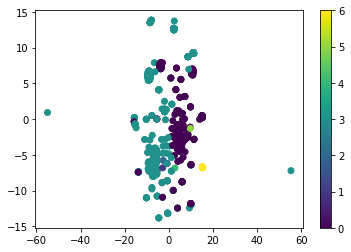

In [124]:
plt.scatter(x, y,c=_pca_df['class'])
plt.colorbar()
plt.show()

In [ ]:
#DIMENSION REDUCTION
#In the dimension reduction using PCA there are so many features nearly 86 which cannot be fitted into 2 0r 3 components.
#When the n_component = 0.99, 90% percent of vthe data can be classified into clustered. From the elbow plot in mild variation in the 
# slope is observed in 7 to 8. In the t-sne has no significant clusters to differentiate. When tried with other perplexity no 
#significant cluster was found.
